# APFD

## RQ1

In [262]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 200)

In [26]:
import pandas as pd
import os

def get_path_apgd(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'apfd' in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list

def check_attack(path):
#     attack_check_list = ['pgdattack', 'nodeembeddingattack', 'randomattack', 'dice', 'minmax']
    attack_check_list = ['dice', 'minmax', 'nodeembeddingattack_add', 'nodeembeddingattack_remove',
                         'pgdattack', 'randomattack_add', 'randomattack_flip', 'randomattack_remove']
    for i in attack_check_list:
        if i in path:
            return True
    return False


def check_weight_stacking_voting(s):
    if 'weight' in s:
        return 1
    if 'stacking' in s:
        return 1
    if 'voting' in s:
        return 1
    return 0

path_list = get_path_apgd('/Users/yinghua.li/Documents/Pycharm/NodeRank/results')

path_list = sorted([i for i in path_list if not check_attack(i)])

path_list = sorted(path_list)
data_list = []
for path in path_list:
    df = pd.read_csv(path, header=None, names=['subject', 'apfd'])
    data_list.append(df)
df = pd.concat(data_list, ignore_index=True)
df['data'] = [i.split('_')[0] for i in df['subject']] 
df['gnn'] = [i.split('_')[1] for i in df['subject']] 
df['method'] = [i.split('_')[2] for i in df['subject']]

dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy'}

dic_data = {'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed'}
df['data'] = [dic_data[i] for i in df['data']]

df['gnn'] = [dic[i] for i in df['gnn']]
df['method'] = [dic[i] for i in df['method']]

df['check'] = df['subject'].apply(check_weight_stacking_voting)
df = df[df['check']==0]
del df['check']

approach_list = ['Random', 'DeepGini', 'VanillaSM', 'PCS', 'Entropy', 'NodeRank']
data_list = ['CiteSeer', 'Cora', 'LastFM', 'PubMed']
gnn_list = ['GAT', 'GCN', 'GraphSAGE', 'TAGCN']

res_list = []
for method in approach_list:
    tmp_list = [method]
    for data in data_list:
        for gnn in gnn_list:
            apfd = df[(df['method']==method) & (df['data']==data) & (df['gnn']==gnn)]['apfd'].values[0]
            apfd = str(round(apfd, 4))
            apfd = apfd +'0'* (6-len(apfd))
            tmp_list.append(apfd)
    res_list.append(tmp_list)  
    
df_re = pd.DataFrame(res_list, columns=['Approach']+['GAT', 'GCN', 'GraphSAGE', 'TAGCN']*4)

# df_re.to_excel('tables/RQ1_apfd_clean.xlsx', index=False)

df_re

,Approach,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN
0,Random,0.4849,0.4889,0.4961,0.4930,0.5104,0.5145,0.5113,0.4733,0.4930,0.4940,0.5007,0.5103,0.4948,0.4954,0.5156,0.4981
1,DeepGini,0.6380,0.6439,0.6120,0.6277,0.7200,0.7268,0.7101,0.6932,0.5856,0.6917,0.7592,0.7399,0.6377,0.6938,0.6083,0.6153
2,VanillaSM,0.6753,0.6721,0.6659,0.6728,0.7528,0.7443,0.7352,0.7414,0.6386,0.7374,0.7809,0.7722,0.6622,0.7090,0.6585,0.6585
3,PCS,0.6813,0.6726,0.6821,0.6803,0.7439,0.7283,0.7183,0.7345,0.6534,0.7502,0.7721,0.7632,0.6488,0.5995,0.6590,0.6620
4,Entropy,0.6363,0.6421,0.6092,0.6182,0.7096,0.7218,0.7052,0.6759,0.5248,0.6114,0.6114,0.6193,0.6396,0.6942,0.6099,0.6170
5,NodeRank,0.7313,0.7132,0.7390,0.7340,0.8202,0.8053,0.8100,0.8140,0.8145,0.8260,0.8228,0.8142,0.7672,0.7591,0.7833,0.7802


In [27]:
# del df_re['Approach']
# m = df_re.to_numpy().astype(float)

In [28]:
# m

array([[0.4849, 0.4889, 0.4961, 0.493 , 0.5104, 0.5145, 0.5113, 0.4733,
        0.493 , 0.494 , 0.5007, 0.5103, 0.4948, 0.4954, 0.5156, 0.4981],
       [0.638 , 0.6439, 0.612 , 0.6277, 0.72  , 0.7268, 0.7101, 0.6932,
        0.5856, 0.6917, 0.7592, 0.7399, 0.6377, 0.6938, 0.6083, 0.6153],
       [0.6753, 0.6721, 0.6659, 0.6728, 0.7528, 0.7443, 0.7352, 0.7414,
        0.6386, 0.7374, 0.7809, 0.7722, 0.6622, 0.709 , 0.6585, 0.6585],
       [0.6813, 0.6726, 0.6821, 0.6803, 0.7439, 0.7283, 0.7183, 0.7345,
        0.6534, 0.7502, 0.7721, 0.7632, 0.6488, 0.5995, 0.659 , 0.662 ],
       [0.6363, 0.6421, 0.6092, 0.6182, 0.7096, 0.7218, 0.7052, 0.6759,
        0.5248, 0.6114, 0.6114, 0.6193, 0.6396, 0.6942, 0.6099, 0.617 ],
       [0.7313, 0.7132, 0.739 , 0.734 , 0.8202, 0.8053, 0.81  , 0.814 ,
        0.8145, 0.826 , 0.8228, 0.8142, 0.7672, 0.7591, 0.7833, 0.7802]])

## RQ2

In [181]:
import pandas as pd
import os

def udf_attack_label(s):
    attack_check_list = ['dice', 'minmax', 'nodeembeddingattack_add', 'nodeembeddingattack_remove',
                         'pgdattack', 'randomattack_add', 'randomattack_flip', 'randomattack_remove']
    for i in attack_check_list:
        if i in s:
            return i
    return 'error'
    
def get_path_apgd(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'apfd' in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list

def check_attack(path):
#     attack_check_list = ['pgdattack', 'nodeembeddingattack', 'randomattack', 'dice', 'minmax']
    attack_check_list = ['dice', 'minmax', 'nodeembeddingattack_add', 'nodeembeddingattack_remove',
                         'pgdattack', 'randomattack_add', 'randomattack_flip', 'randomattack_remove']
    for i in attack_check_list:
        if i in path:
            return True
    return False


def check_weight_stacking_voting(s):
    if 'weight' in s:
        return 1
    if 'stacking' in s:
        return 1
    if 'voting' in s:
        return 1
    return 0

path_list = get_path_apgd('/Users/yinghua.li/Documents/Pycharm/NodeRank/results')

path_list = sorted([i for i in path_list if check_attack(i)])  # attack data

path_list = sorted(path_list)
data_list = []
for path in path_list:
    df = pd.read_csv(path, header=None, names=['subject', 'apfd'])
    data_list.append(df)
df = pd.concat(data_list, ignore_index=True)
df['attack'] = df['subject'].apply(udf_attack_label)
df['approach'] = [i.split('_')[-1] for i in df['subject']]
df['model'] = [i.split('_')[1] for i in df['subject']]
df.head()

dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy',
      'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed',
      'dice': 'DICE', 'minmax': 'MMA', 'nodeembeddingattack_add': 'NEAA', 'nodeembeddingattack_remove': 'NEAR', 
      'pgdattack': 'PGD', 'randomattack_add': 'RAA', 'randomattack_flip': 'RAF', 'randomattack_remove': 'RAR'}

df['model'] = [dic[i] for i in df['model']]
df['attack'] = [dic[i] for i in df['attack']]

df['check'] = df['subject'].apply(check_weight_stacking_voting)
df = df[df['check']==0]
del df['check']
df['approach'] = [dic[i] for i in df['approach']]


attack_list = ['DICE', 'MMA', 'NEAA', 'NEAR', 'PGD', 'RAA', 'RAF', 'RAR']
approach_list = ['Random', 'DeepGini', 'VanillaSM', 'PCS', 'Entropy', 'NodeRank']
gnn_list = ['GAT', 'GCN', 'GraphSAGE', 'TAGCN']

res_list = []
for attack in attack_list:
    for method in approach_list:
        tmp_list = [attack, method]
        for gnn in gnn_list:
            try:
                apfd = df[(df['attack']==attack)& (df['approach']==method) & (df['model']==gnn)]['apfd'].values[0]
                apfd = str(round(apfd, 4))
                apfd = apfd +'0'* (6-len(apfd))
                tmp_list.append(apfd)
            except:
                tmp_list.append('-')
        res_list.append(tmp_list)
        
res_list
df_re = pd.DataFrame(res_list, columns=['Attack', 'Approach']+['GAT', 'GCN', 'GraphSAGE', 'TAGCN'])
df_re = df_re.dropna()
df = df_re.copy()
print(df_re.head(20))
res = df_re.to_numpy()

del df_re['Attack']
del df_re['Approach']
m = df_re.to_numpy().astype(float)

improve_res = []
for i in range(len(m)):
    if 0<=i<=5:
        tmp = (m[5]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 6<=i<=11:
        tmp = (m[11]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 12<=i<=17:
        tmp = (m[17]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 18<=i<=23:
        tmp = (m[23]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 24<=i<=29:
        tmp = (m[29]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 30<=i<=35:
        tmp = (m[35]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 36<=i<=41:
        tmp = (m[41]-m[i]) / m[i]
        improve_res.append(tmp)
    elif 42<=i<=47:
        tmp = (m[47]-m[i]) / m[i]
        improve_res.append(tmp)
        
def get_4_value(i):
    i = "%.2f%%" % (i*100)
    i = i +'0'* (5-len(i))
    return i

new_res = []
for i in range(len(improve_res)):
    tmp_new_res = []
    for j in range(len(improve_res[i])):
        if improve_res[i][j] == 0:
            tmp_new_res.append('-')
        else:
            tmp_new_res.append(get_4_value(improve_res[i][j]))
    new_res.append(tmp_new_res)
new_res = np.array(new_res)

all_res = np.concatenate((res, new_res), axis=1)

df_rq2 = pd.DataFrame(all_res, columns=['Attack', 'Approach']+['GAT', 'GCN', 'GraphSAGE', 'TAGCN']*2)

df_rq2.to_excel('tables/RQ2_apfd_adv.xlsx', index=False)

df_rq2

   Attack   Approach     GAT     GCN GraphSAGE   TAGCN
0    DICE     Random  0.4918  0.5037    0.5117  0.5181
1    DICE   DeepGini  0.6227  0.6302    0.6053  0.6109
2    DICE  VanillaSM  0.6453  0.6541    0.6511  0.6443
3    DICE        PCS  0.6419  0.6535    0.6706  0.6457
4    DICE    Entropy  0.6213  0.6288    0.6031  0.6048
5    DICE   NodeRank  0.7266  0.7074    0.7335  0.7223
6     MMA     Random  0.4899  0.5345    0.5106  0.4707
7     MMA   DeepGini  0.6395  0.6325    0.6135  0.6174
8     MMA  VanillaSM  0.6636  0.6630    0.6660  0.6587
9     MMA        PCS  0.6618  0.6663    0.6788  0.6693
10    MMA    Entropy  0.6382  0.6309    0.6107  0.6108
11    MMA   NodeRank  0.7391  0.7121    0.7350  0.7262
12   NEAA     Random  0.4812  0.5011    0.5057  0.4991
13   NEAA   DeepGini  0.6964  0.7043    0.6798  0.6766
14   NEAA  VanillaSM  0.7105  0.7196    0.7036  0.7376
15   NEAA        PCS  0.6881  0.6947    0.6911  0.7325
16   NEAA    Entropy  0.6901  0.6997    0.6756  0.6631
17   NEAA 

,Attack,Approach,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN
0,DICE,Random,0.4918,0.5037,0.5117,0.5181,47.74%,40.44%,43.35%,39.41%
1,DICE,DeepGini,0.6227,0.6302,0.6053,0.6109,16.69%,12.25%,21.18%,18.24%
2,DICE,VanillaSM,0.6453,0.6541,0.6511,0.6443,12.60%,8.15%,12.66%,12.11%
3,DICE,PCS,0.6419,0.6535,0.6706,0.6457,13.20%,8.25%,9.38%,11.86%
4,DICE,Entropy,0.6213,0.6288,0.6031,0.6048,16.95%,12.50%,21.62%,19.43%
5,DICE,NodeRank,0.7266,0.7074,0.7335,0.7223,-,-,-,-
6,MMA,Random,0.4899,0.5345,0.5106,0.4707,50.87%,33.23%,43.95%,54.28%
7,MMA,DeepGini,0.6395,0.6325,0.6135,0.6174,15.57%,12.58%,19.80%,17.62%
8,MMA,VanillaSM,0.6636,0.6630,0.6660,0.6587,11.38%,7.41%,10.36%,10.25%
9,MMA,PCS,0.6618,0.6663,0.6788,0.6693,11.68%,6.87%,8.28%,8.50%


## RQ2-dice

In [196]:
import pandas as pd
import os

def udf_attack_label(s):
    attack_check_list = ['dice', 'minmax', 'nodeembeddingattack_add', 'nodeembeddingattack_remove',
                         'pgdattack', 'randomattack_add', 'randomattack_flip', 'randomattack_remove']
    for i in attack_check_list:
        if i in s:
            return i
    return 'error'
    
def get_path_apgd(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'apfd' in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list

def check_attack(path):
#     attack_check_list = ['pgdattack', 'nodeembeddingattack', 'randomattack', 'dice', 'minmax']
    attack_check_list = ['dice', 'minmax', 'nodeembeddingattack_add', 'nodeembeddingattack_remove',
                         'pgdattack', 'randomattack_add', 'randomattack_flip', 'randomattack_remove']
    for i in attack_check_list:
        if i in path:
            return True
    return False


def check_weight_stacking_voting(s):
    if 'weight' in s:
        return 1
    if 'stacking' in s:
        return 1
    if 'voting' in s:
        return 1
    return 0

path_list = get_path_apgd('/Users/yinghua.li/Documents/Pycharm/NodeRank/results')

path_list = sorted([i for i in path_list if check_attack(i)])  # attack data

path_list = sorted(path_list)
data_list = []
for path in path_list:
    df = pd.read_csv(path, header=None, names=['subject', 'apfd'])
    data_list.append(df)
df = pd.concat(data_list, ignore_index=True)
df['attack'] = df['subject'].apply(udf_attack_label)
df['approach'] = [i.split('_')[-1] for i in df['subject']]
df['model'] = [i.split('_')[1] for i in df['subject']]
df['data'] = [i.split('_')[0] for i in df['subject']]


dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy',
      'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed',
      'dice': 'DICE', 'minmax': 'MMA', 'nodeembeddingattack_add': 'NEAA', 'nodeembeddingattack_remove': 'NEAR', 
      'pgdattack': 'PGD', 'randomattack_add': 'RAA', 'randomattack_flip': 'RAF', 'randomattack_remove': 'RAR'}

df['model'] = [dic[i] for i in df['model']]
df['attack'] = [dic[i] for i in df['attack']]

df['check'] = df['subject'].apply(check_weight_stacking_voting)
df = df[df['check']==0]
del df['check']
df['approach'] = [dic[i] for i in df['approach']]
df['data'] = [dic[i] for i in df['data']]
df = df[df['attack']=='DICE']
approach_list = ['Random', 'DeepGini', 'VanillaSM', 'PCS', 'Entropy', 'NodeRank']
data_list = ['CiteSeer', 'Cora', 'LastFM', 'PubMed']
gnn_list = ['GAT', 'GCN', 'GraphSAGE', 'TAGCN']

res_list = []
for method in approach_list:
    tmp_list = [method]
    for data in data_list:
        for gnn in gnn_list:
            apfd = df[(df['approach']==method) & (df['data']==data) & (df['model']==gnn)]['apfd'].values[0]
            apfd = str(round(apfd, 4))
            apfd = apfd +'0'* (6-len(apfd))
            tmp_list.append(apfd)
    res_list.append(tmp_list)  
    
df_re = pd.DataFrame(res_list, columns=['Approach']+['GAT', 'GCN', 'GraphSAGE', 'TAGCN']*4)

df_re.to_excel('tables/RQ2_apfd_dice.xlsx', index=False)

df_re

,Approach,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN,GAT,GCN,GraphSAGE,TAGCN
0,Random,0.4918,0.5037,0.5117,0.5181,0.5099,0.4961,0.5289,0.4883,0.5163,0.5024,0.5012,0.4893,0.4989,0.5027,0.4841,0.5009
1,DeepGini,0.6227,0.6302,0.6053,0.6109,0.7121,0.7178,0.6917,0.6862,0.5833,0.6854,0.7403,0.7165,0.6413,0.6606,0.6167,0.6141
2,VanillaSM,0.6453,0.6541,0.6511,0.6443,0.7278,0.7303,0.7145,0.7328,0.6300,0.7267,0.7628,0.7561,0.6567,0.6733,0.6532,0.6464
3,PCS,0.6419,0.6535,0.6706,0.6457,0.7080,0.7062,0.6994,0.7232,0.6437,0.7383,0.7539,0.7459,0.6364,0.5838,0.6498,0.6471
4,Entropy,0.6213,0.6288,0.6031,0.6048,0.7054,0.7140,0.6877,0.6725,0.5310,0.6283,0.6065,0.5996,0.6427,0.6608,0.6179,0.6154
5,NodeRank,0.7266,0.7074,0.7335,0.7223,0.8065,0.7899,0.8083,0.7935,0.8057,0.8160,0.8208,0.8037,0.7572,0.7416,0.7827,0.7679


## RQ3-model

In [308]:
import pandas as pd
import os

def get_path_apgd(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'apfd' in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list


def udf_attack(s):
    check_list = ['pgdattack', 'nodeembeddingattack_remove', 'randomattack_add', 'randomattack_flip',
                  'randomattack_remove', 'dice', 'minmax', 'nodeembeddingattack_add']
    for i in check_list:
        if i in s:
            return 'yes'
    return 'no'


def udf_get_attack(s):
    check_list = ['pgdattack', 'nodeembeddingattack_remove', 'randomattack_add', 'randomattack_flip',
                  'randomattack_remove', 'dice', 'minmax', 'nodeembeddingattack_add']
    for i in check_list:
        if i in s:
            return i
        
dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy',
      'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed',
      'dice': 'DICE', 'minmax': 'MMA', 'nodeembeddingattack_add': 'NEAA', 'nodeembeddingattack_remove': 'NEAR', 
      'pgdattack': 'PGD', 'randomattack_add': 'RAA', 'randomattack_flip': 'RAF', 'randomattack_remove': 'RAR'}

path_list = get_path_apgd('./results')
path_list = [i for i in path_list if 'apfd' in i]
path_list = sorted(path_list)

data_list = []
for path in path_list:
    df = pd.read_csv(path, header=None, names=['subject', 'apfd'])
    data_list.append(df)
df = pd.concat(data_list, ignore_index=True)

df['data'] = [i.split('_')[0] for i in df['subject']]
df['model'] = [i.split('_')[1] for i in df['subject']]
df['approach'] = [i.split('_')[-1] for i in df['subject']]
df['attack_check'] = df['subject'].apply(udf_attack)

df_attack = df[df['attack_check']=='yes']
df_attack['attack'] = df_attack['subject'].apply(udf_get_attack)
df_clean = df[df['attack_check']=='no']



<ipython-input-308-0cfc179f9206>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack['attack'] = df_attack['subject'].apply(udf_get_attack)


In [309]:
df_clean.head()

,subject,apfd,data,model,approach,attack_check
0,citeseer_gat_fusion,0.731311,citeseer,gat,fusion,no
1,citeseer_gat_deepGini,0.638040,citeseer,gat,deepGini,no
2,citeseer_gat_vanillasm,0.675313,citeseer,gat,vanillasm,no
3,citeseer_gat_pcs,0.681319,citeseer,gat,pcs,no
4,citeseer_gat_entropy,0.636262,citeseer,gat,entropy,no


In [310]:
approach_list = list(set(df['approach']))
dic = dict(zip(approach_list, [0]*len(approach_list)))

for sub, pdf in df_clean.groupby(['data', 'model']):
    tmp_dic = dict(zip(pdf['approach'], pdf['apfd']))
    key = max(tmp_dic,key=tmp_dic.get)
    dic[key] += 1
    
print('clean', dic)

df_clean = df_clean.groupby(['approach', 'model']).agg({'apfd': 'mean'}).reset_index()

approach_list = ['random', 'deepGini', 'vanillasm', 'pcs', 'entropy', 'voting', 'stacking', 'weight', 'fusion']
model_list = ['gat', 'gcn', 'graphsage', 'tagcn']

res_list = []
for approach in approach_list:
    tmp_res = [approach]
    for model in model_list:
        apfd = df_clean[(df_clean['approach']==approach) & (df_clean['model']==model)]['apfd'].values[0]
        apfd = str(round(apfd, 4))
        apfd = apfd +'0'* (6-len(apfd))
        tmp_list.append(apfd)
        tmp_res.append(apfd)
    res_list.append(tmp_res)
    
df_res = pd.DataFrame(res_list, columns=['approach']+model_list)
df_res.to_excel('tables/RQ3-clean.xlsx', index=False)
df_res

clean {'fusion': 10, 'vanillasm': 0, 'random': 0, 'deepGini': 0, 'weight': 6, 'entropy': 0, 'pcs': 0, 'voting': 0, 'stacking': 0}


,approach,gat,gcn,graphsage,tagcn
0,random,0.4958,0.4982,0.5059,0.4937
1,deepGini,0.6454,0.6891,0.6724,0.6690
2,vanillasm,0.6822,0.7157,0.7102,0.7112
3,pcs,0.6818,0.6876,0.7079,0.7100
4,entropy,0.6276,0.6674,0.6339,0.6326
5,voting,0.7511,0.7532,0.7498,0.7468
6,stacking,0.7510,0.7506,0.7500,0.7552
7,weight,0.7832,0.7758,0.7889,0.7855
8,fusion,0.7833,0.7759,0.7888,0.7856


In [311]:
approach_list = list(set(df['approach']))
dic = dict(zip(approach_list, [0]*len(approach_list)))

for sub, pdf in df_attack.groupby(['data', 'attack', 'model']):
    tmp_dic = dict(zip(pdf['approach'], pdf['apfd']))
    key = max(tmp_dic,key=tmp_dic.get)
    dic[key] += 1
    
print('attack', dic)

df_attack = df_attack.groupby(['approach', 'model']).agg({'apfd': 'mean'}).reset_index()

approach_list = ['random', 'deepGini', 'vanillasm', 'pcs', 'entropy', 'voting', 'stacking', 'weight', 'fusion']
model_list = ['gat', 'gcn', 'graphsage', 'tagcn']

res_list = []
for approach in approach_list:
    tmp_res = [approach]
    for model in model_list:
        apfd = df_attack[(df_attack['approach']==approach) & (df_attack['model']==model)]['apfd'].values[0]
        apfd = str(round(apfd, 4))
        apfd = apfd +'0'* (6-len(apfd))
        tmp_list.append(apfd)
        tmp_res.append(apfd)
    res_list.append(tmp_res)
    
df_res = pd.DataFrame(res_list, columns=['approach']+model_list)
df_res.to_excel('tables/RQ3-attack.xlsx', index=False)
df_res

attack {'fusion': 60, 'vanillasm': 0, 'random': 0, 'deepGini': 0, 'weight': 48, 'entropy': 0, 'pcs': 0, 'voting': 0, 'stacking': 0}


,approach,gat,gcn,graphsage,tagcn
0,random,0.5005,0.5033,0.5002,0.4965
1,deepGini,0.6446,0.6821,0.6754,0.6681
2,vanillasm,0.6742,0.7064,0.7077,0.7088
3,pcs,0.6690,0.6826,0.7025,0.7060
4,entropy,0.6284,0.6651,0.6378,0.6327
5,voting,0.7518,0.7504,0.7553,0.7466
6,stacking,0.7537,0.7498,0.7583,0.7533
7,weight,0.7808,0.7747,0.7916,0.7812
8,fusion,0.7808,0.7746,0.7916,0.7812


## RQ3-data

In [334]:
import pandas as pd
import os

def get_path_apgd(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv') and 'apfd' in file_absolute_path:
                    path_list.append(file_absolute_path)
    return path_list


def udf_attack(s):
    check_list = ['pgdattack', 'nodeembeddingattack_remove', 'randomattack_add', 'randomattack_flip',
                  'randomattack_remove', 'dice', 'minmax', 'nodeembeddingattack_add']
    for i in check_list:
        if i in s:
            return 'yes'
    return 'no'


def udf_get_attack(s):
    check_list = ['pgdattack', 'nodeembeddingattack_remove', 'randomattack_add', 'randomattack_flip',
                  'randomattack_remove', 'dice', 'minmax', 'nodeembeddingattack_add']
    for i in check_list:
        if i in s:
            return i
        
dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy',
      'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed',
      'dice': 'DICE', 'minmax': 'MMA', 'nodeembeddingattack_add': 'NEAA', 'nodeembeddingattack_remove': 'NEAR', 
      'pgdattack': 'PGD', 'randomattack_add': 'RAA', 'randomattack_flip': 'RAF', 'randomattack_remove': 'RAR'}

path_list = get_path_apgd('./results')
path_list = [i for i in path_list if 'apfd' in i]
path_list = sorted(path_list)

data_list = []
for path in path_list:
    df = pd.read_csv(path, header=None, names=['subject', 'apfd'])
    data_list.append(df)
df = pd.concat(data_list, ignore_index=True)

df['data'] = [i.split('_')[0] for i in df['subject']]
df['model'] = [i.split('_')[1] for i in df['subject']]
df['approach'] = [i.split('_')[-1] for i in df['subject']]
df['attack_check'] = df['subject'].apply(udf_attack)
df_attack = df[df['attack_check']=='yes']
df_attack['attack'] = df_attack['subject'].apply(udf_get_attack)
df_clean = df[df['attack_check']=='no']



<ipython-input-334-e1fcec4eeae4>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack['attack'] = df_attack['subject'].apply(udf_get_attack)


In [335]:
df_clean.head()

,subject,apfd,data,model,approach,attack_check
0,citeseer_gat_fusion,0.731311,citeseer,gat,fusion,no
1,citeseer_gat_deepGini,0.638040,citeseer,gat,deepGini,no
2,citeseer_gat_vanillasm,0.675313,citeseer,gat,vanillasm,no
3,citeseer_gat_pcs,0.681319,citeseer,gat,pcs,no
4,citeseer_gat_entropy,0.636262,citeseer,gat,entropy,no


In [336]:
df_clean = df_clean.groupby(['approach', 'data']).agg({'apfd': 'mean'}).reset_index()

approach_list = ['random', 'deepGini', 'vanillasm', 'pcs', 'entropy', 'voting', 'stacking', 'weight', 'fusion']
data_list = ['citeseer', 'cora', 'lastfm', 'pubmed']

res_list = []
avg_apfd_list = []
for approach in approach_list:
    tmp_res = [approach]
    tmp_all = []
    for data in data_list:
        apfd = df_clean[(df_clean['approach']==approach) & (df_clean['data']==data)]['apfd'].values[0]
        tmp_all.append(apfd)
        apfd = str(round(apfd, 4))
        apfd = apfd +'0'* (6-len(apfd))
        tmp_list.append(apfd)
        tmp_res.append(apfd)
    avg_apfd = round(sum(tmp_all) / len(tmp_all), 4)
    res_list.append(tmp_res)
    avg_apfd_list.append(avg_apfd)
    
df_res = pd.DataFrame(res_list, columns=['approach']+data_list)
df_res['Avg'] = avg_apfd_list
df_res.to_excel('tables/RQ3-clean_data.xlsx', index=False)
df_res

,approach,citeseer,cora,lastfm,pubmed,Avg
0,random,0.4907,0.5024,0.4995,0.5010,0.4984
1,deepGini,0.6304,0.7126,0.6941,0.6388,0.6690
2,vanillasm,0.6715,0.7434,0.7323,0.6721,0.7048
3,pcs,0.6791,0.7313,0.7347,0.6423,0.6969
4,entropy,0.6265,0.7031,0.5917,0.6402,0.6404
5,voting,0.6853,0.7827,0.7903,0.7426,0.7502
6,stacking,0.6867,0.7827,0.7927,0.7447,0.7517
7,weight,0.7294,0.8124,0.8193,0.7724,0.7834
8,fusion,0.7294,0.8124,0.8194,0.7724,0.7834


In [337]:
df_attack = df_attack.groupby(['approach', 'data']).agg({'apfd': 'mean'}).reset_index()

approach_list = ['random', 'deepGini', 'vanillasm', 'pcs', 'entropy', 'voting', 'stacking', 'weight', 'fusion']
data_list = ['citeseer', 'cora', 'lastfm', 'pubmed']

res_list = []
avg_apfd_list = []
for approach in approach_list:
    tmp_res = [approach]
    tmp_all = []
    for data in data_list:
        apfd = df_attack[(df_attack['approach']==approach) & (df_attack['data']==data)]['apfd'].values[0]
        tmp_all.append(apfd)
        apfd = str(round(apfd, 4))
        apfd = apfd +'0'* (6-len(apfd))
        tmp_list.append(apfd)
        tmp_res.append(apfd)
    avg_apfd = round(sum(tmp_all) / len(tmp_all), 4)
    res_list.append(tmp_res)
    avg_apfd_list.append(avg_apfd)
    
df_res = pd.DataFrame(res_list, columns=['approach']+data_list)
df_res['Avg'] = avg_apfd_list
df_res.to_excel('tables/RQ3-attack_data.xlsx', index=False)
df_res

,approach,citeseer,cora,lastfm,pubmed,Avg
0,random,0.4990,0.5027,0.4995,0.4985,0.5000
1,deepGini,0.6289,0.7016,0.6863,0.6390,0.6639
2,vanillasm,0.6623,0.7298,0.7243,0.6665,0.6957
3,pcs,0.6660,0.7161,0.7264,0.6369,0.6863
4,entropy,0.6262,0.6938,0.5942,0.6401,0.6386
5,voting,0.6919,0.7763,0.7855,0.7362,0.7475
6,stacking,0.6940,0.7773,0.7913,0.7386,0.7503
7,weight,0.7299,0.8026,0.8151,0.7684,0.7790
8,fusion,0.7299,0.8026,0.8151,0.7683,0.7790


In [347]:
sum([0.7298,0.8026,0.8150,0.7684])/4

0.77895

# PFD

## RQ1

In [79]:
path_list = ['results/pfd_citeseer_gat.csv', 'results/pfd_citeseer_gcn.csv', 'results/pfd_citeseer_graphsage.csv', 'results/pfd_citeseer_tagcn.csv',
             'results/pfd_cora_gat.csv', 'results/pfd_cora_gcn.csv', 'results/pfd_cora_graphsage.csv', 'results/pfd_cora_tagcn.csv', 
             'results/pfd_lastfm_gat.csv', 'results/pfd_lastfm_gcn.csv', 'results/pfd_lastfm_graphsage.csv', 'results/pfd_lastfm_tagcn.csv', 
             'results/pfd_pubmed_gat.csv', 'results/pfd_pubmed_gcn.csv', 'results/pfd_pubmed_graphsage.csv', 'results/pfd_pubmed_tagcn.csv']
df_list = []
for path in path_list:
    tmp_df = pd.read_csv(path, names=['name', 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
    df_list.append(tmp_df)
df = pd.concat(df_list, ignore_index=True)
df = df[['name', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]
dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy', 'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed',
      'weight': 'NodeRank_W', 'stacking': 'NodeRank_S', 'voting': 'NodeRank_V'}



df['Data'] = [i.split('_')[0] for i in df['name']]
df['Approach'] = [i.split('_')[-1] for i in df['name']]
df['Data'] = [dic[i] for i in df['Data']]
df['Approach'] = [dic[i] for i in df['Approach']]

df = df[['Data', 'Approach',0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
df = df.groupby(['Data', 'Approach']).agg('mean').reset_index()

# df.to_excel('tables/RQ1_pfd_clean.xlsx', index=False)
df

,Data,Approach,0.1,0.2,0.3,0.4,0.5,0.6,0.7
0,CiteSeer,DeepGini,0.191650,0.335900,0.459025,0.584900,0.685175,0.766050,0.847475
1,CiteSeer,Entropy,0.192575,0.333275,0.455850,0.578175,0.682900,0.761900,0.844125
2,CiteSeer,NodeRank,0.272400,0.518725,0.682700,0.772875,0.826550,0.865450,0.905825
3,CiteSeer,NodeRank_S,0.249000,0.515550,0.643925,0.692825,0.734775,0.787475,0.839325
4,CiteSeer,NodeRank_V,0.250700,0.517250,0.639750,0.687825,0.730475,0.784925,0.844225
5,CiteSeer,NodeRank_W,0.272400,0.518725,0.682700,0.772875,0.826550,0.865450,0.905825
6,CiteSeer,PCS,0.218050,0.395050,0.551350,0.667075,0.757200,0.842500,0.897050
7,CiteSeer,Random,0.099450,0.203875,0.289875,0.377700,0.479550,0.582450,0.682200
8,CiteSeer,VanillaSM,0.214625,0.390725,0.531525,0.642050,0.738725,0.828325,0.896750
9,Cora,DeepGini,0.253050,0.436200,0.612475,0.732525,0.810475,0.872525,0.928950


In [80]:
name_list = ['CiteSeer', 'Cora', 'LastFM', 'PubMed']
approach_list = ['Random', 'DeepGini', 'VanillaSM', 'PCS', 'Entropy', 'NodeRank']
new_df_list = []
for name in name_list:
    for approach in approach_list:
        tmp_df = df[(df['Data']==name)&(df['Approach']==approach)]
        new_df_list.append(tmp_df)
df = pd.concat(new_df_list, ignore_index=True)
cols = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for col in cols:
    tmp_list = list(df[col])
    tmp_list = [str(round(i, 4)) for i in tmp_list]
    tmp_list = [i +'0'* (6-len(i)) for i in tmp_list]
    df[col] = tmp_list

# df.to_excel('tables/RQ1_pfd_clean.xlsx', index=False)
df

,Data,Approach,0.1,0.2,0.3,0.4,0.5,0.6,0.7
0,CiteSeer,Random,0.0994,0.2039,0.2899,0.3777,0.4796,0.5824,0.6822
1,CiteSeer,DeepGini,0.1917,0.3359,0.4590,0.5849,0.6852,0.7661,0.8475
2,CiteSeer,VanillaSM,0.2146,0.3907,0.5315,0.6421,0.7387,0.8283,0.8967
3,CiteSeer,PCS,0.2181,0.3951,0.5514,0.6671,0.7572,0.8425,0.8971
4,CiteSeer,Entropy,0.1926,0.3333,0.4558,0.5782,0.6829,0.7619,0.8441
5,CiteSeer,NodeRank,0.2724,0.5187,0.6827,0.7729,0.8266,0.8655,0.9058
6,Cora,Random,0.1114,0.2134,0.3039,0.3931,0.4908,0.6060,0.7018
7,Cora,DeepGini,0.2530,0.4362,0.6125,0.7325,0.8105,0.8725,0.9289
8,Cora,VanillaSM,0.2644,0.4762,0.6575,0.7739,0.8663,0.9296,0.9588
9,Cora,PCS,0.2456,0.4601,0.6278,0.7592,0.8494,0.9081,0.9534


## RQ2

In [227]:
def get_path(path_dir_compile):
    path_list = []
    if os.path.isdir(path_dir_compile):
        for root, dirs, files in os.walk(path_dir_compile, topdown=True):
            for file in files:
                file_absolute_path = os.path.join(root, file)
                if file_absolute_path.endswith('.csv'):
                    path_list.append(file_absolute_path)
    return path_list

def check_weight_stacking_voting(s):
    if 'weight' in s:
        return 1
    if 'stacking' in s:
        return 1
    if 'voting' in s:
        return 1
    return 0

check_path_list = ['results/pfd_citeseer_gat.csv', 'results/pfd_citeseer_gcn.csv', 'results/pfd_citeseer_graphsage.csv', 'results/pfd_citeseer_tagcn.csv',
             'results/pfd_cora_gat.csv', 'results/pfd_cora_gcn.csv', 'results/pfd_cora_graphsage.csv', 'results/pfd_cora_tagcn.csv', 
             'results/pfd_lastfm_gat.csv', 'results/pfd_lastfm_gcn.csv', 'results/pfd_lastfm_graphsage.csv', 'results/pfd_lastfm_tagcn.csv', 
             'results/pfd_pubmed_gat.csv', 'results/pfd_pubmed_gcn.csv', 'results/pfd_pubmed_graphsage.csv', 'results/pfd_pubmed_tagcn.csv']

all_path_list = get_path('./results')
all_path_list = [i for i in all_path_list if 'apfd' not in i]
path_list = []

for i in all_path_list:
    check = True
    for j in check_path_list:
        if j in i:
            check = False
            break
    if check==True:
        path_list.append(i)


df_list = []
for path in path_list:
    tmp_df = pd.read_csv(path, names=['name', 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
    df_list.append(tmp_df)
df = pd.concat(df_list, ignore_index=True)
df = df[['name', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]
df['label'] = df['name'].apply(check_weight_stacking_voting)
df = df[df['label']==0]

dic = {'gat': 'GAT', 'gcn': 'GCN', 'tagcn': 'TAGCN', 'graphsage': 'GraphSAGE', 'xgb': 'XGB', 'lgb': 'LGB', 'rf': 'RF', 
       'lr': 'LR', 'mutation': 'Mutation', 'fusion': 'NodeRank',
       'deepGini': 'DeepGini', 'leastConfidence': 'Least Confidence', 'margin': 'Margin', 'random': 'Random',
      'vanillasm': 'VanillaSM', 'pcs': 'PCS', 'entropy': 'Entropy',
      'citeseer': 'CiteSeer', 'cora': 'Cora', 'lastfm': 'LastFM', 'pubmed': 'PubMed',
      'dice': 'DICE', 'minmax': 'MMA', 'nodeembeddingattack_add': 'NEAA', 'nodeembeddingattack_remove': 'NEAR', 
      'pgdattack': 'PGD', 'randomattack_add': 'RAA', 'randomattack_flip': 'RAF', 'randomattack_remove': 'RAR'}

def udf_attack_label(s):
    attack_check_list = ['dice', 'minmax', 'nodeembeddingattack_add', 'nodeembeddingattack_remove',
                         'pgdattack', 'randomattack_add', 'randomattack_flip', 'randomattack_remove']
    for i in attack_check_list:
        if i in s:
            return i
    return 'error'

df['Attack'] = df['name'].apply(udf_attack_label)
df['Attack'] = [dic[i] for i in df['Attack']]
df['Approach'] = [i.split('_')[-1] for i in df['name']]
df['Approach'] = [dic[i] for i in df['Approach']]


df = df[['Attack', 'Approach',0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
df = df.groupby(['Attack', 'Approach']).agg('mean').reset_index()

# # df.to_excel('tables/RQ2_pfd_adv.xlsx', index=False)
# df

df


,Attack,Approach,0.1,0.2,0.3,0.4,0.5,0.6,0.7
0,DICE,DeepGini,0.212113,0.380419,0.522537,0.632862,0.727762,0.804763,0.871194
1,DICE,Entropy,0.210675,0.364687,0.496250,0.601356,0.691488,0.766381,0.831394
2,DICE,NodeRank,0.301019,0.578300,0.765506,0.847000,0.891112,0.922431,0.946025
3,DICE,PCS,0.206844,0.388969,0.546869,0.677863,0.773619,0.845494,0.899600
4,DICE,Random,0.101506,0.203919,0.301644,0.404263,0.501856,0.604313,0.701488
5,DICE,VanillaSM,0.221369,0.406194,0.560544,0.690575,0.780269,0.854325,0.907419
6,MMA,DeepGini,0.214325,0.383213,0.531888,0.656500,0.748812,0.827013,0.887275
7,MMA,Entropy,0.212762,0.380350,0.525825,0.649175,0.741150,0.818575,0.880575
8,MMA,NodeRank,0.307737,0.583100,0.734625,0.821638,0.877412,0.912000,0.936075
9,MMA,PCS,0.215613,0.414275,0.581237,0.699150,0.796462,0.874575,0.928600


In [228]:
name_list = ['DICE', 'MMA', 'NEAA', 'NEAR', 'PGD', 'RAA', 'RAF', 'RAR']
approach_list = ['Random', 'DeepGini', 'VanillaSM', 'PCS', 'Entropy', 'NodeRank']
new_df_list = []
for name in name_list:
    for approach in approach_list:
        tmp_df = df[(df['Attack']==name)&(df['Approach']==approach)]
        new_df_list.append(tmp_df)
df = pd.concat(new_df_list, ignore_index=True)
cols = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
for col in cols:
    tmp_list = list(df[col])
    tmp_list = [str(round(i, 4)) for i in tmp_list]
    tmp_list = [i +'0'* (6-len(i)) for i in tmp_list]
    df[col] = tmp_list

df.to_excel('tables/RQ2_pfd_adv.xlsx', index=False)
df

,Attack,Approach,0.1,0.2,0.3,0.4,0.5,0.6,0.7
0,DICE,Random,0.1015,0.2039,0.3016,0.4043,0.5019,0.6043,0.7015
1,DICE,DeepGini,0.2121,0.3804,0.5225,0.6329,0.7278,0.8048,0.8712
2,DICE,VanillaSM,0.2214,0.4062,0.5605,0.6906,0.7803,0.8543,0.9074
3,DICE,PCS,0.2068,0.3890,0.5469,0.6779,0.7736,0.8455,0.8996
4,DICE,Entropy,0.2107,0.3647,0.4962,0.6014,0.6915,0.7664,0.8314
5,DICE,NodeRank,0.3010,0.5783,0.7655,0.8470,0.8911,0.9224,0.9460
6,MMA,Random,0.1046,0.2058,0.2991,0.4043,0.5082,0.5993,0.7067
7,MMA,DeepGini,0.2143,0.3832,0.5319,0.6565,0.7488,0.8270,0.8873
8,MMA,VanillaSM,0.2303,0.4228,0.5842,0.7025,0.7963,0.8737,0.9337
9,MMA,PCS,0.2156,0.4143,0.5812,0.6991,0.7965,0.8746,0.9286


# Plot

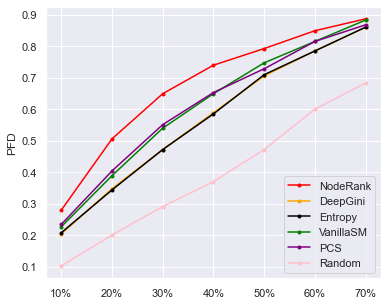

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clean CiteSeer	TAGCN

df = pd.read_csv('results/pfd_citeseer_gcn.csv', header=None, names=['subject', 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
df = df[['subject', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
df


Random= [0.1019,0.2000,0.2906,0.3698,0.4717,0.6000,0.6830]
DeepGini = [0.2038,0.3472,0.4717,0.5887,0.7057,0.7849,0.8604]
VanillaSM= [0.2264,0.3887,0.5396,0.6491,0.7472,0.8151,0.8830]
PCS= [0.2340,0.4038,0.5509,0.6528,0.7283,0.8151,0.8679]
Entropy= [0.2075,0.3434,0.4717,0.5849,0.7094,0.7849,0.8604]
NodeRank = [0.2792,0.5057,0.6491,0.7396,0.7925,0.8491,0.8868]

plt.figure(figsize=(6, 5))

x = ['10%', '20%','30%', '40%', '50%', '60%', '70%']
plt.plot(x, NodeRank, color="red", marker='o', markersize=3)
plt.plot(x, DeepGini, color="orange", marker='o', markersize=3)
plt.plot(x, Entropy, color="black", marker='o', markersize=3)
# plt.plot(x, LeastConfidence, color="cyan", marker='o', markersize=3)
# plt.plot(x, Margin, color="blue", marker='o', markersize=3)
plt.plot(x, VanillaSM, color="green", marker='o', markersize=3)
plt.plot(x, PCS, color="purple", marker='o', markersize=3)
plt.plot(x, Random, color="pink", marker='o', markersize=3)
plt.ylabel("PFD")
# 设置图例
plt.legend(['NodeRank', 'DeepGini', 'Entropy', 'VanillaSM', 'PCS', 'Random'], loc="lower right")

plt.savefig('tables/clean_CiteSeer_TAGCN.pdf', dpi=300, transparent=False)
plt.show()




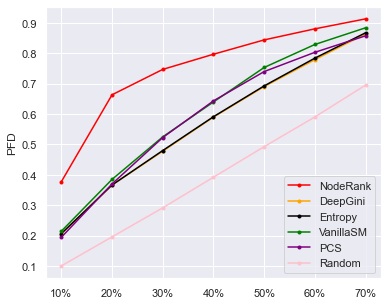

In [100]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clean PubMed	GAT

df = pd.read_csv('results/pfd_pubmed_gat.csv', header=None, names=['subject', 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
df = df[['subject', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
df


Random= [0.1006,0.1961,0.2917,0.3923,0.4929,0.5906,0.6954]
DeepGini = [0.2061,0.3666,0.4779,0.5899,0.6904,0.7789,0.8638]
VanillaSM= [0.2147,0.3852,0.5250,0.6398,0.7532,0.8288,0.8837]
PCS= [0.1947,0.3702,0.5228,0.6434,0.7397,0.8031,0.8573]
Entropy= [0.2068,0.3666,0.4800,0.5913,0.6926,0.7839,0.8673]
NodeRank = [0.3773,0.6633,0.7468,0.7967,0.8438,0.8802,0.9130]

plt.figure(figsize=(6, 5))

x = ['10%', '20%','30%', '40%', '50%', '60%', '70%']
plt.plot(x, NodeRank, color="red", marker='o', markersize=3)
plt.plot(x, DeepGini, color="orange", marker='o', markersize=3)
plt.plot(x, Entropy, color="black", marker='o', markersize=3)
# plt.plot(x, LeastConfidence, color="cyan", marker='o', markersize=3)
# plt.plot(x, Margin, color="blue", marker='o', markersize=3)
plt.plot(x, VanillaSM, color="green", marker='o', markersize=3)
plt.plot(x, PCS, color="purple", marker='o', markersize=3)
plt.plot(x, Random, color="pink", marker='o', markersize=3)
plt.ylabel("PFD")
# 设置图例
plt.legend(['NodeRank', 'DeepGini', 'Entropy', 'VanillaSM', 'PCS', 'Random'], loc="lower right")

plt.savefig('tables/clean_PubMed_GAT.pdf', dpi=300, transparent=False)
plt.show()




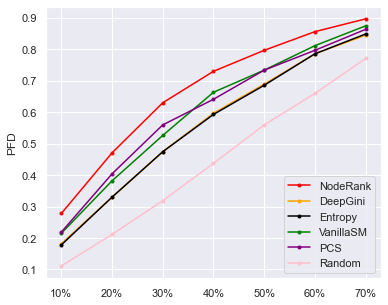

In [235]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clean MMA,CiteSeer,GCN
df = pd.read_csv('results/pfd_citeseer_gcn_minmax.csv', header=None, names=['subject', 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
df = df[['subject', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
df


Random= [0.1111,0.2111,0.3185,0.4370,0.5593,0.6593,0.7704]
DeepGini = [0.1815,0.3296,0.4741,0.5963,0.6889,0.7852,0.8444]
VanillaSM= [0.2148,0.3815,0.5259,0.6630,0.7333,0.8111,0.8741]
PCS= [0.2185,0.4037,0.5593,0.6407,0.7333,0.7963,0.8630]
Entropy= [0.1778,0.3296,0.4741,0.5926,0.6852,0.7852,0.8481]
NodeRank = [0.2778,0.4704,0.6296,0.7296,0.7963,0.8556,0.8963]

plt.figure(figsize=(6, 5))

x = ['10%', '20%','30%', '40%', '50%', '60%', '70%']
plt.plot(x, NodeRank, color="red", marker='o', markersize=3)
plt.plot(x, DeepGini, color="orange", marker='o', markersize=3)
plt.plot(x, Entropy, color="black", marker='o', markersize=3)
# plt.plot(x, LeastConfidence, color="cyan", marker='o', markersize=3)
# plt.plot(x, Margin, color="blue", marker='o', markersize=3)
plt.plot(x, VanillaSM, color="green", marker='o', markersize=3)
plt.plot(x, PCS, color="purple", marker='o', markersize=3)
plt.plot(x, Random, color="pink", marker='o', markersize=3)
plt.ylabel("PFD")
# 设置图例
plt.legend(['NodeRank', 'DeepGini', 'Entropy', 'VanillaSM', 'PCS', 'Random'], loc="lower right")

plt.savefig('tables/MMA_CiteSeer_GCN.pdf', dpi=300, transparent=False)
plt.show()





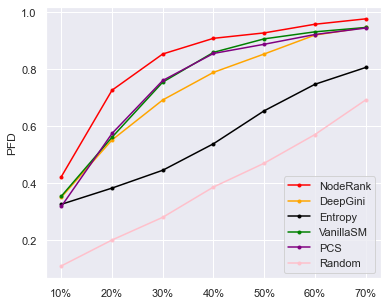

In [236]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clean PGD, LastFM, GraphSAGE
df = pd.read_csv('results/pfd_lastfm_graphsage_pgdattack.csv', header=None, names=['subject', 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
df = df[['subject', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]]
df


Random= [0.1101,0.2011,0.2808,0.3871,0.4706,0.5712,0.6926]
DeepGini = [0.3510,0.5522,0.6926,0.7894,0.8539,0.9203,0.9469]
VanillaSM= [0.3548,0.5617,0.7552,0.8596,0.9070,0.9317,0.9469]
PCS= [0.3188,0.5750,0.7609,0.8558,0.8880,0.9222,0.9450]
Entropy= [0.3264,0.3833,0.4459,0.5389,0.6546,0.7476,0.8065]
NodeRank = [0.4231,0.7268,0.8539,0.9089,0.9279,0.9583,0.9772]

plt.figure(figsize=(6, 5))

x = ['10%', '20%','30%', '40%', '50%', '60%', '70%']
plt.plot(x, NodeRank, color="red", marker='o', markersize=3)
plt.plot(x, DeepGini, color="orange", marker='o', markersize=3)
plt.plot(x, Entropy, color="black", marker='o', markersize=3)
# plt.plot(x, LeastConfidence, color="cyan", marker='o', markersize=3)
# plt.plot(x, Margin, color="blue", marker='o', markersize=3)
plt.plot(x, VanillaSM, color="green", marker='o', markersize=3)
plt.plot(x, PCS, color="purple", marker='o', markersize=3)
plt.plot(x, Random, color="pink", marker='o', markersize=3)
plt.ylabel("PFD")
# 设置图例
plt.legend(['NodeRank', 'DeepGini', 'Entropy', 'VanillaSM', 'PCS', 'Random'], loc="lower right")

plt.savefig('tables/PGD_LastFM_GraphSAGE.pdf', dpi=300, transparent=False)
plt.show()



